In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib nbagg
from Object_detection_features import *
import gym
from gym import wrappers
import lib
from importlib import reload
from skimage.transform import resize
from skimage.color import rgb2gray

% matplotlib inline

In [2]:
env = gym.make('Skiing-v0')
# Самая долгая часть. Считается один раз. В конструкторе находятся все классы объектов и фон
odf = ObjectDetectionFeatures(env)

[2017-01-23 21:22:03,172] Making new env: Skiing-v0


In [3]:
from keras.models import model_from_json
import json

with open('./data/Encoder_21_01.txt', 'r') as model_file:
     encoder = model_from_json(json.loads(next(model_file)))

Using Theano backend.


In [4]:
encoder.load_weights('./data/Encoder_21_01.h5')

In [9]:
max_observations = 20000
sample_observations = []
render = False
count = 0

env_name = 'Skiing-v0'
env = gym.make(env_name)

while True:
    if len(sample_observations) >= max_observations: break
    s = env.reset()
    if count % 10 == 0:
        observation = env.ale.getScreenGrayscale()
        sample_observations.append(odf.get_simple_image(rgb2gray(observation[:, :, 0])))
    count += 1
    done = False

    while not done:
        if render: env.render()
        if len(sample_observations) >= max_observations: break
        a = env.action_space.sample()
        s, r, done, _ = env.step(a)
        if count % 10 == 0:
            observation = env.ale.getScreenGrayscale()
            sample_observations.append(odf.get_simple_image(rgb2gray(observation[:, :, 0])))
            if not len(sample_observations) % 500:
                print(len(sample_observations))
        a = env.action_space.sample()
        count += 1
        
env.close()

[2017-01-23 19:47:51,119] Making new env: Skiing-v0


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000


In [13]:
#sample_observations = np.array(sample_observations)
#sample_observations = sample_observations.reshape(20000, 1, 60, 60)
#sample_features = encoder.predict(sample_observations)
#np.savez('./data/sample_features_20k.npz', sample_features)

In [5]:
sample_features = np.load('./data/sample_features_20k.npz')['sample_features']

In [6]:
sample_features.shape

(20000, 64)

In [7]:
mean = np.mean(sample_features, axis=0)
std = np.std(sample_features, axis=0)
state_transform = lambda state: (encoder.predict(odf.get_simple_image(rgb2gray((state) * 255).astype('uint8')).reshape([1, 1, 60, 60])).squeeze() - mean) / std

In [8]:
env = gym.make('Skiing-v0')

[2017-01-23 21:24:22,851] Making new env: Skiing-v0


In [12]:
reload(lib)
lib.run(env, state_transform, alpha_init=1e-5)

Initial replay filled with (100) records
Initial replay filled with (200) records
Initial replay filled with (300) records
Initial replay filled with (400) records
Initial replay filled with (500) records
Initial replay filled with (600) records
Initial replay filled with (700) records
Initial replay filled with (800) records
Initial replay filled with (900) records
Initial replay filled with (1000) records
Episode #1 ended! Reward: -28182
Eps reduced to 0.7462
Episodes: 1. Steps: 5000. Score: -28182.00 Alpha: 1e-05 Eps: 0.74625
reward =  -5723.0
q =  [-47.978 -47.989 -48.001]
w norm =  [ 3.444  3.444  3.446]
Episode #2 ended! Reward: -18725
Eps reduced to 0.7425
Episodes: 2. Steps: 10000. Score: -23453.50 Alpha: 1e-05 Eps: 0.74252
reward =  -21030.0
q =  [-98.955 -96.488 -96.41 ]
w norm =  [ 7.098  6.92   6.915]
Episode #3 ended! Reward: -36097
Eps reduced to 0.7388
Episodes: 3. Steps: 15000. Score: -27668.00 Alpha: 1e-05 Eps: 0.73881
reward =  -19152.0
q =  [-148.415 -144.592 -144.57

KeyboardInterrupt: 

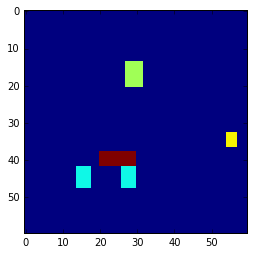

In [16]:
np.linalg.norm(predicted - test_observations)**2 / test_observations.size

ValueError: operands could not be broadcast together with shapes (1000,64) (1000,1,60,60) 

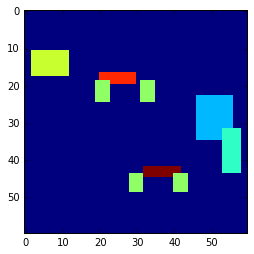

In [17]:
plt.imshow(test_observations[25][0], interpolation='Nearest')

TypeError: Invalid dimensions for image data

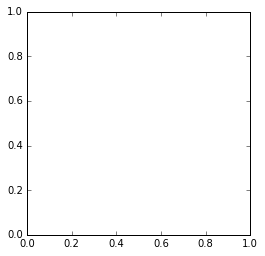

In [18]:
plt.imshow(model.predict(np.array([test_observations[25]]))[0, 0], interpolation='Nearest')